## Часть 3. Проверка гипотез

Заметим, что в нашем датасете есть много совместных треков, которые обозначаются через feat. в поле `track`. Можем предположить, что из-за самого факта наличия приглашённого артиста на треке прослушиваний будет больше, так как артисты таким образом обмениваются аудиториями: аудитория основного артиста узнаёт о приглашённом и наоборот. Тогда среднее количество прослушиваний совместных треков гипотетически будет больше, чем сольных.

Проверим гипотезу о наличии взаимосвязи между фактом присутствия приглашённого артиста на треке и количеством прослушиваний.

Нулевая гипотеза: нет связи между фактом наличия приглашённого артиста в треке и количеством прослушиваний.

Альтернативная гипотеза: есть связь между фактом наличия приглашённого артиста в треке и количеством прослушиваний.

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spotify_cleaned.csv")
df

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,1040234854,3.710667
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,310083733,3.336217
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,63063467,3.585833
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,434663559,3.897783
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,617259738,5.682000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17963,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,5,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,9227144,1.577783
17964,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,10898176,2.514283
17965,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,6226110,2.280700
17966,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,9,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,6873961,1.806450


Найдём все способы обозначений приглашённого артиста.

In [3]:
df[df.track.str.contains('feat.', regex=False)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1,-3.930,0.0522,0.04250,0.046900,0.1160,0.551,108.014,63063467,3.585833
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,0.716,0.897,4,-7.185,0.0629,0.01200,0.262000,0.3250,0.358,127.030,10666154,4.569033
7,Gorillaz,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,0.726,0.815,11,-5.886,0.0313,0.00799,0.081000,0.1120,0.462,140.158,159605929,3.492667
8,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,0.741,0.913,2,-3.340,0.0465,0.00343,0.103000,0.3250,0.643,120.012,42671901,3.562500
27,50 Cent,Is This Love ('09) (feat. 50 Cent),Curtain Call 2,album,0.853,0.776,8,-4.221,0.2610,0.07140,0.000000,0.1810,0.659,94.028,28529840,3.533550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17582,Gazo,BODIES (feat. Damso),KMT,album,0.906,0.518,1,-7.104,0.1800,0.00864,0.001740,0.0711,0.259,146.060,25492899,2.772883
17583,Gazo,MAUVAIS 2X (feat. Ninho),MAUVAIS 2X (feat. Ninho),single,0.736,0.666,0,-7.851,0.2550,0.36000,0.000000,0.0881,0.744,138.656,51663165,4.006217
17672,MEDUZA,Bad Memories (feat. Elley Duhé & FAST BOY),Bad Memories (feat. Elley Duhé & FAST BOY),single,0.607,0.767,5,-6.069,0.0474,0.11800,0.000000,0.1220,0.662,123.998,149174546,2.477150
17673,MEDUZA,Paradise (feat. Dermot Kennedy),Paradise,single,0.632,0.595,8,-7.644,0.0401,0.06890,0.000000,0.2090,0.435,124.114,601107554,2.798383


In [4]:
df[df.track.str.contains('ft.', regex=False, case=False)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
205,2Pac,All Eyez On Me (ft. Big Syke),All Eyez On Me,album,0.872,0.723,1,-5.968,0.2470,0.0293,0.000000,0.3270,0.843,93.279,428728611,5.129550
209,2Pac,2 Of Amerikaz Most Wanted (ft. Snoop Doggy Dogg),All Eyez On Me,album,0.849,0.904,8,-4.780,0.1380,0.0248,0.000051,0.0545,0.854,99.258,178709066,4.108883
303,21 Savage,Knife Talk (with 21 Savage ft. Project Pat),Certified Lover Boy,album,0.849,0.424,5,-9.579,0.3240,0.0635,0.000000,0.0834,0.153,145.887,501420741,4.049433
3045,Los Auténticos Decadentes,Loco (Tu Forma de Ser) [Ft. Rubén Albarrán] - ...,Fiesta Nacional (Mtv Unplugged),album,0.587,0.639,7,-8.065,0.0357,0.3950,0.000000,0.6800,0.789,116.499,148463447,4.155117
3047,Los Auténticos Decadentes,Amor (Ft. Mon Laferte) - MTV Unplugged,Fiesta Nacional (Mtv Unplugged),album,0.620,0.717,9,-7.165,0.0361,0.0274,0.000000,0.7080,0.601,92.881,122943312,5.208533
7243,Damian Marley,"Medication (ft. Stephen Marley, Wiz Khalifa, T...",Medication (Remix),single,0.813,0.585,10,-6.856,0.2660,0.0223,0.000000,0.2100,0.847,84.995,35643208,4.085783
7835,Rick Ross,Money In The Grave (Drake ft. Rick Ross),The Best In The World Pack,single,0.831,0.502,10,-4.045,0.0460,0.1010,0.000000,0.1220,0.101,100.541,826816158,3.423783
9392,Ñengo Flow,La Llevo Al Cielo (Ft. Ñengo Flow),La Llevo Al Cielo (Ft. Ñengo Flow),single,0.795,0.845,9,-3.809,0.1350,0.1050,0.000011,0.1720,0.769,170.023,261092249,4.248667
9971,Steve Aoki,New York ft. mazie,New York ft. mazie,single,0.409,0.760,6,-5.291,0.2640,0.2860,0.000003,0.0807,0.601,103.909,2270706,2.203800
11253,Drake,Knife Talk (with 21 Savage ft. Project Pat),Certified Lover Boy,album,0.849,0.424,5,-9.579,0.3240,0.0635,0.000000,0.0834,0.153,145.887,501420741,4.049433


In [5]:
df[df.track.str.contains('(with', regex=False, case=False)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
121,Pharrell Williams,"Stay With Me (with Justin Timberlake, Halsey &...",Funk Wav Bounces Vol. 2,album,0.810,0.733,9,-6.338,0.0444,0.27600,0.000007,0.2880,0.900,125.975,99934776,3.821383
127,Khalid,lovely (with Khalid),lovely (with Khalid),single,0.351,0.296,4,-10.109,0.0333,0.93400,0.000000,0.0950,0.120,115.284,2110573779,3.336433
131,Khalid,Eastside (with Halsey & Khalid),FRIENDS KEEP SECRETS,album,0.632,0.686,6,-7.665,0.2430,0.54900,0.000000,0.2000,0.329,89.949,1424962511,2.846167
136,Khalid,Love Lies (with Normani),Love Lies (with Normani),single,0.708,0.648,6,-5.626,0.0449,0.09560,0.000000,0.1340,0.338,143.955,843423744,3.361783
146,Machine Gun Kelly,my ex's best friend (with blackbear),Tickets To My Downfall,album,0.731,0.675,5,-5.134,0.0434,0.00473,0.000000,0.1410,0.298,124.939,574531280,2.324350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17840,BoyWithUke,Sick of U (with Oliver Tree),Sick of U,single,0.676,0.814,0,-3.213,0.0585,0.27700,0.000000,0.0953,0.601,92.554,44129835,2.811267
17843,BoyWithUke,IDGAF (with blackbear),Serotonin Dreams,album,0.782,0.728,5,-5.930,0.0768,0.42700,0.000000,0.2500,0.876,97.975,152547498,2.344450
17848,BoyWithUke,Prairies (with mxmtoon),Serotonin Dreams,album,0.717,0.700,1,-5.843,0.0382,0.18900,0.000000,0.3740,0.568,103.517,21156648,3.199550
17872,Silk Sonic,After Last Night (with Thundercat & Bootsy Col...,An Evening With Silk Sonic,album,0.651,0.703,0,-8.958,0.0816,0.02970,0.000000,0.0608,0.647,140.051,94525595,4.157400


In [6]:
df[df.artist.str.contains(',', regex=False, case=False)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
1345,"Earth, Wind & Fire",Let's Groove,Raise!,album,0.869,0.648,11,-8.698,0.0633,0.12100,0.000022,0.1260,0.900,125.035,430077729,5.655333
1346,"Earth, Wind & Fire",Boogie Wonderland,I Am,album,0.802,0.756,2,-10.791,0.0349,0.08430,0.007650,0.0521,0.963,131.715,343817778,4.804883
1347,"Earth, Wind & Fire",After the Love Has Gone,I Am,album,0.424,0.443,6,-13.450,0.0382,0.53200,0.000389,0.6730,0.391,131.675,112553060,4.634000
1348,"Earth, Wind & Fire",Shining Star,That's The Way Of The World,album,0.676,0.692,9,-13.093,0.0520,0.66800,0.009150,0.1300,0.799,102.516,82024994,2.836000
1349,"Earth, Wind & Fire","September - from DreamWorks Animation's ""TROLLS""",TROLLS (Original Motion Picture Soundtrack),album,0.774,0.849,9,-2.986,0.0301,0.01600,0.000199,0.0348,0.962,126.996,73117976,3.916667
1350,"Earth, Wind & Fire",Beijo (Interlude),All 'N All,album,0.841,0.752,11,-11.165,0.0898,0.24800,0.006800,0.1050,0.549,112.362,8234500,1.335783
1351,"Earth, Wind & Fire",Fantasy,All 'N All,album,0.608,0.745,4,-8.772,0.0857,0.32300,0.004280,0.1350,0.614,88.941,23604673,4.623550
1352,"Earth, Wind & Fire",In the Stone,I Am,album,0.656,0.662,4,-10.346,0.0493,0.09640,0.000612,0.0853,0.717,114.612,25001079,4.808000
4708,"Hank Williams, Jr.",Family Tradition,Family Tradition,album,0.660,0.523,4,-12.068,0.0608,0.02380,0.000000,0.1420,0.794,126.342,121920128,4.049333
4709,"Hank Williams, Jr.",A Country Boy Can Survive,The Pressure Is On,album,0.688,0.459,7,-9.353,0.0365,0.14400,0.000000,0.0816,0.493,75.184,128648571,4.250000


Видим, что в нашем датасете приглашённые артисты как правило указываются в названии трека через варианты сокращений слова featuring (от англ. "с участием"): "feat." и "ft.".

Также в ряде случаев приглашённый артист указывается через "with", однако само по себе слово "with" в английском языке может быть использовано в разных контекстах, а не только как обозначение приглашённого артиста, поэтому также заметим, что приглашённый артист через "with" обычно прописывается в скобках.

Основываясь на найденных закономерностях, добавим в наш датасет поле `is_feat`, которое будет принимать значения 0 либо 1 в зависимости от наличия приглашённого артиста в песне.

In [7]:
condition = (df['track'].str.contains('feat.', regex=False, case=False)
             | df['track'].str.contains('ft.', regex=False, case=False)
             | df['track'].str.contains('(with', regex=False, case=False))

df['is_feat'] = condition.astype(int)

df[df.is_feat == 1]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min,is_feat
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1,-3.930,0.0522,0.04250,0.046900,0.1160,0.551,108.014,63063467,3.585833,1
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,0.716,0.897,4,-7.185,0.0629,0.01200,0.262000,0.3250,0.358,127.030,10666154,4.569033,1
7,Gorillaz,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,0.726,0.815,11,-5.886,0.0313,0.00799,0.081000,0.1120,0.462,140.158,159605929,3.492667,1
8,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,0.741,0.913,2,-3.340,0.0465,0.00343,0.103000,0.3250,0.643,120.012,42671901,3.562500,1
27,50 Cent,Is This Love ('09) (feat. 50 Cent),Curtain Call 2,album,0.853,0.776,8,-4.221,0.2610,0.07140,0.000000,0.1810,0.659,94.028,28529840,3.533550,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17843,BoyWithUke,IDGAF (with blackbear),Serotonin Dreams,album,0.782,0.728,5,-5.930,0.0768,0.42700,0.000000,0.2500,0.876,97.975,152547498,2.344450,1
17848,BoyWithUke,Prairies (with mxmtoon),Serotonin Dreams,album,0.717,0.700,1,-5.843,0.0382,0.18900,0.000000,0.3740,0.568,103.517,21156648,3.199550,1
17872,Silk Sonic,After Last Night (with Thundercat & Bootsy Col...,An Evening With Silk Sonic,album,0.651,0.703,0,-8.958,0.0816,0.02970,0.000000,0.0608,0.647,140.051,94525595,4.157400,1
17919,Arcane,Enemy (with JID) - from the series Arcane Leag...,Mercury - Acts 1 & 2,album,0.728,0.783,11,-4.424,0.2660,0.23700,0.000000,0.4340,0.555,77.011,1046179886,2.889683,1


Итого 1987 треков с хотя бы одним приглашённым артистом в датасете. Изучим распределения двух групп.

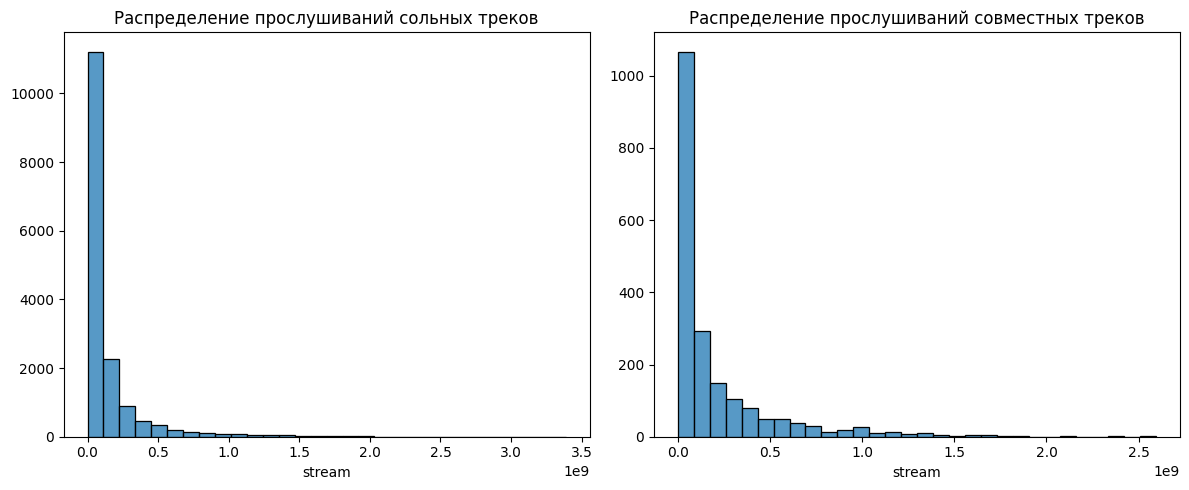

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df[df['is_feat'] == 0], x='stream', bins=30, ax=ax[0])
ax[0].set_title('Распределение прослушиваний сольных треков')
ax[0].set_xlabel('stream')
ax[0].set_ylabel('')

sns.histplot(data=df[df['is_feat'] == 1], x='stream', bins=30, ax=ax[1])
ax[1].set_title('Распределение прослушиваний совместных треков')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

Видим, что распределения не являются нормальными. Проверим размеры выборок.

In [9]:
df[df['is_feat'] == 0].shape[0]

15981

In [10]:
df[df['is_feat'] == 1].shape[0]

1987

Поскольку размеры обеих выборок превышают 30 наблюдений, согласно ЦПТ, мы можем применять t-тест без строгой проверки нормальности распределений — выборочные средние будут иметь приблизительно нормальное распределение независимо от формы исходных распределений.

Также проверим равенство дисперсий.

In [11]:
np.var(df[df['is_feat'] == 0].stream)

5.9068853853442376e+16

In [12]:
np.var(df[df['is_feat'] == 1].stream)

1.0101224930554363e+17

Дисперсии двух групп неравны, поэтому проведём двухвыборочный t-тест Уэлча для сравнения средних.

In [13]:
results = st.ttest_ind(df[df['is_feat'] == 1].stream,
                       df[df['is_feat'] == 0].stream, equal_var=False)

print(f"{results.pvalue:.4f}")

0.0000


p-value < 0.05, следовательно средние групп совместных и сольных треков имеют стат. значимые различия.

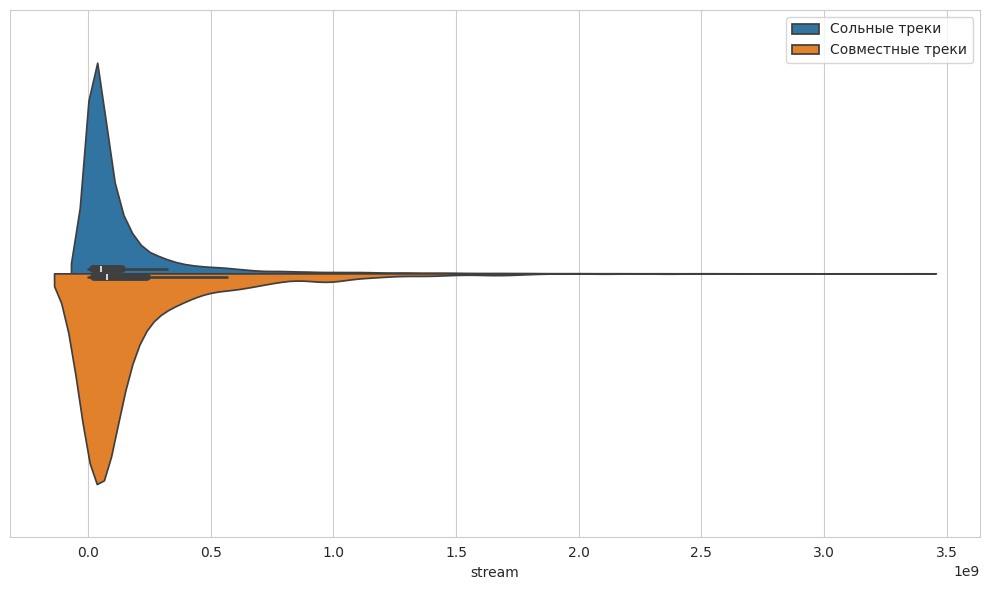

In [14]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.violinplot(data=df, x='stream', hue='is_feat', split=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Сольные треки', 'Совместные треки'])

plt.tight_layout()
plt.show()

Видим, что группы средних пересекаются, однако у совместных треков присутствует продолжительный хвост справа, за счёт которого и появляется статистичиски значимая разница между средними этих групп. Проверим абсолютные значения средних.

In [15]:
print("Среднее для is_feat=1:", df[df['is_feat'] == 1].stream.mean())
print("Среднее для is_feat=0:", df[df['is_feat'] == 0].stream.mean())

Среднее для is_feat=1: 207036871.41217917
Среднее для is_feat=0: 135830489.9405544


Вывод: среднее число прослушиваний треков с приглашённым артистом статистически значимо выше, чем у сольных треков. Проверим коэффициент корреляции для выявления факта взаимосвязи между этими факторами.

In [16]:
r, p_value = st.pointbiserialr(df['is_feat'], df['stream'])

print(f"Корреляция: {r:.3f}, p-value: {p_value:.4f}")

Корреляция: 0.088, p-value: 0.0000


p-value < 0.05, следовательно отклоняем нулевую гипотезу и принимаем альтернативную: есть связь между фактом наличия приглашённого артиста в треке и количеством прослушиваний. Связь слабая (0.088) со знаком +. Возможно, носит нелинейный характер.